In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_csv("udemy_courses.csv")

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year
    - Distribution of subjects per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

# EDA on Subject/Category

1.What is the distribution of subjects


2.How many courses per subject

3.How many people purchase a particular subject

4.Which subject is the most popular


In [5]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
#How many subjects/category in dataset

In [7]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [8]:
len(df["subject"].unique())

4

In [9]:
# What is the distribution of subjects

In [10]:
df["subject"].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

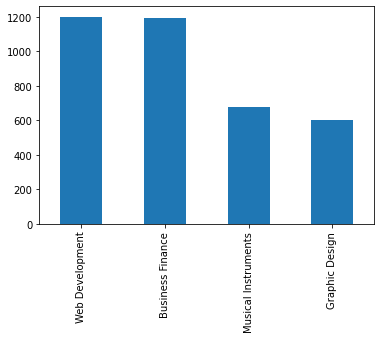

In [11]:
# Visualization by graph 

df["subject"].value_counts().plot(kind="bar")
plt.show()

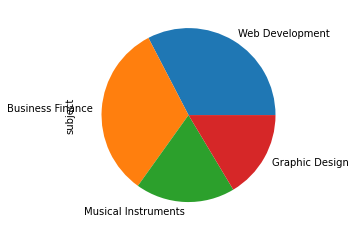

In [12]:
#Visualization by pie chart

df["subject"].value_counts().plot(kind="pie")
plt.show()

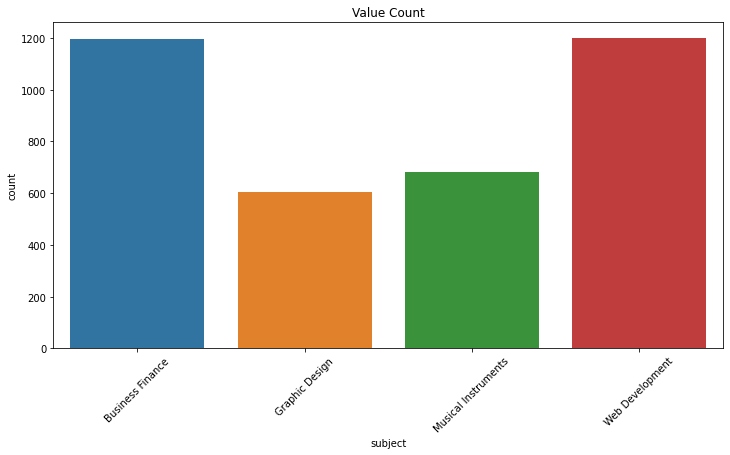

In [13]:
# using seaborn
matplotlib.rcParams["figure.figsize"]=(12,6)
plt.title("Value Count")
plt.xticks(rotation=45)
sns.countplot(df["subject"]);

In [14]:
# How many people purchase a particular subject

In [15]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [16]:
df[["num_subscribers","subject"]].value_counts()

num_subscribers  subject            
0                Business Finance       40
1                Graphic Design         21
0                Graphic Design         19
1                Business Finance       17
2                Business Finance       13
                                        ..
1026             Musical Instruments     1
1027             Business Finance        1
1028             Graphic Design          1
1029             Business Finance        1
268923           Web Development         1
Length: 2785, dtype: int64

#  Subscribers

	- Which course have the highest number of subscribers
    
	- Average number of subscribers
    
	- Number of subscribers per Subject
    
	- Number of subscribers per year
    

In [17]:
#  Number of  Courses per Subject

In [18]:
df["subject"].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [19]:
#  Number of  Subscribers per Subject

In [20]:
df.groupby("subject")["num_subscribers"].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

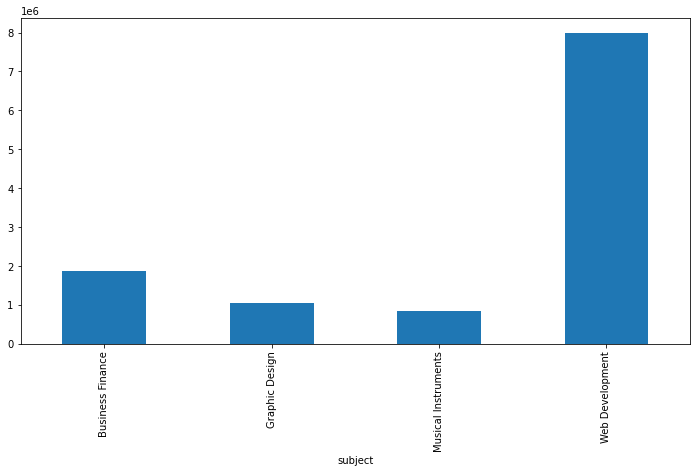

In [21]:
df.groupby("subject")["num_subscribers"].sum().plot(kind="bar");

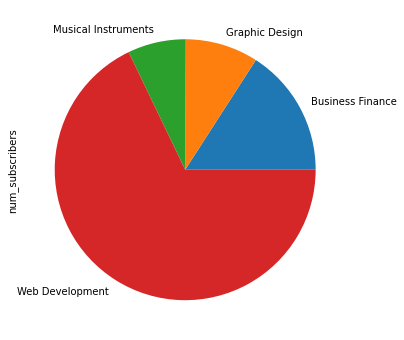

In [22]:
df.groupby("subject")["num_subscribers"].sum().plot(kind="pie");

Narrative

More subscribers for Web dev than Business Finance

The top subject category is Web Dev, Business Finance

In [23]:
# Average number of subscribers
df["num_subscribers"].mean()


3197.150625339859

In [24]:
# Total  number of subscribers
df["num_subscribers"].sum()

11759120

In [25]:
#Minimum number of Subscribers
df["num_subscribers"].min()

0

In [26]:
#Max number of Subscribers
df["num_subscribers"].max()

268923

In [27]:
# Which course have the highest number of subscribers?

In [28]:
df["num_subscribers"].idxmax()

2827

In [29]:
# get the lcation
df.iloc[2827]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                                  0
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                                    10.5
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2827, dtype: object

## Narrative:

Udemy has over 11 million subscribers

Highest num of sub: 268923

Average num of sub: 3193


# EDA on Levels


- How many levels do we have
- What is the distribution of courses per levels
- Which subject have the highest levels
- How many subscribers per levels
- How many courses per level

In [30]:
df["level"]

0               All Levels
1               All Levels
2       Intermediate Level
3               All Levels
4       Intermediate Level
               ...        
3673            All Levels
3674        Beginner Level
3675            All Levels
3676            All Levels
3677        Beginner Level
Name: level, Length: 3678, dtype: object

In [31]:
# How many levels do we have

In [32]:
df["level"].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [33]:
df["level"].nunique()

4

In [34]:
# What is the distribution of courses per levels

In [35]:
df["level"].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<AxesSubplot:>

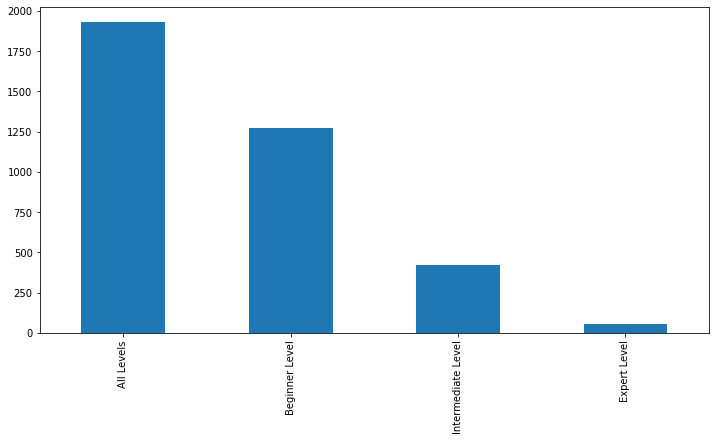

In [36]:
df["level"].value_counts().plot(kind="bar")

<AxesSubplot:>

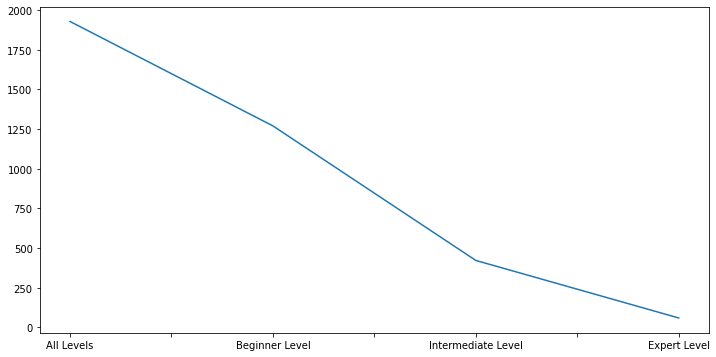

In [37]:
df["level"].value_counts().plot(kind="line")

<AxesSubplot:ylabel='level'>

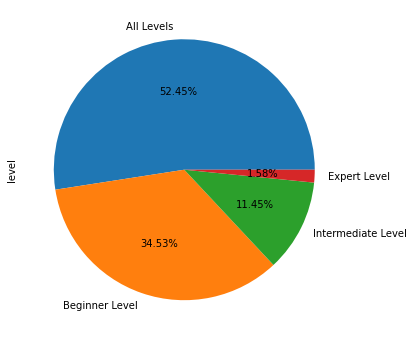

In [38]:
df["level"].value_counts().plot(kind="pie",autopct="%1.2f%%",)

In [39]:
# Which subject have the highest levels

In [40]:
df.groupby('level')["num_subscribers"].sum()

level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [41]:
df[["num_subscribers","level"]]

,num_subscribers,level
0,2147,All Levels
1,2792,All Levels
2,2174,Intermediate Level
3,2451,All Levels
4,1276,Intermediate Level
...,...,...
3673,1040,All Levels
3674,306,Beginner Level
3675,513,All Levels
3676,300,All Levels


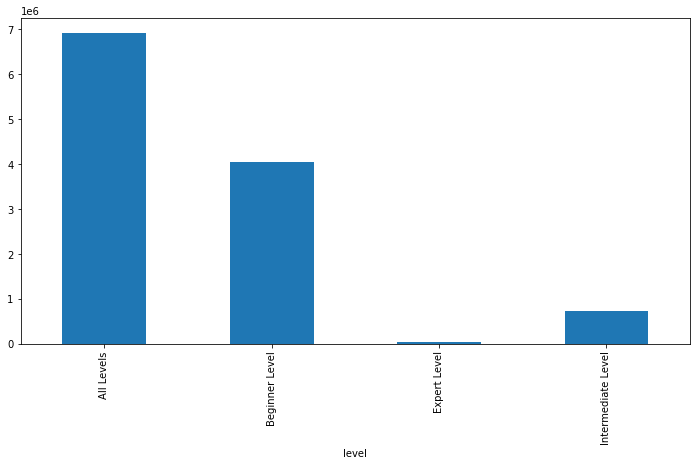

In [42]:
df.groupby('level')["num_subscribers"].sum().plot(kind="bar");

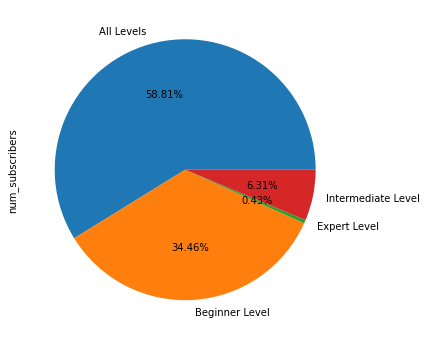

In [43]:
df.groupby('level')["num_subscribers"].sum().plot(kind="pie",autopct="%1.2f%%");

In [44]:
# How many levels per subject category?
df.groupby("subject")["level"].value_counts()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

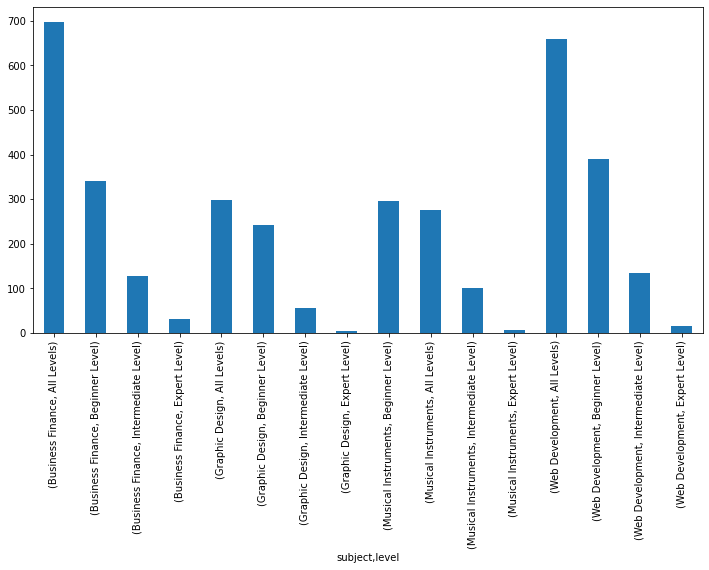

In [45]:
# How many levels per subject category? by graph
df.groupby("subject")["level"].value_counts().plot(kind="bar");

<AxesSubplot:xlabel='level', ylabel='num_subscribers'>

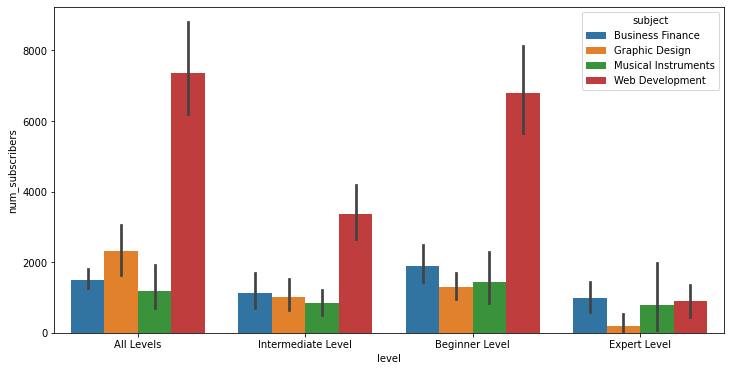

In [46]:
# using seaborn
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="level",y="num_subscribers",data=df,hue="subject")

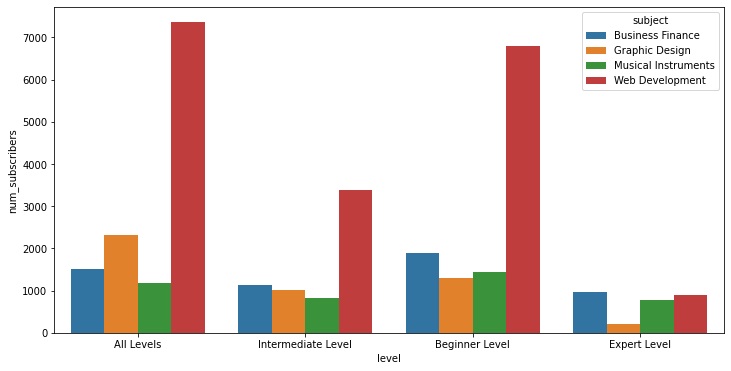

In [47]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="level",y="num_subscribers",data=df,hue="subject",ci=None);

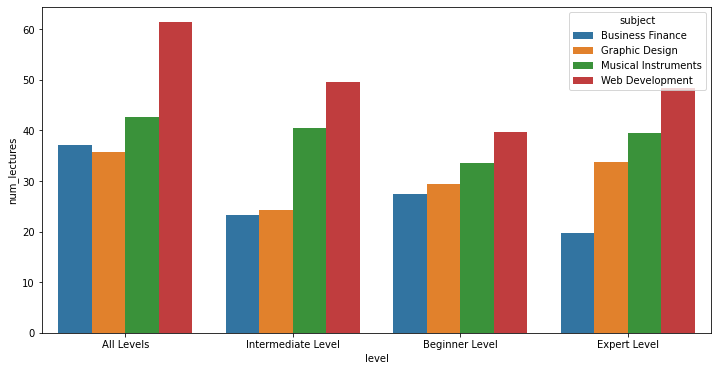

In [48]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="level",y="num_lectures",data=df,hue="subject",ci=None);


#  Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [49]:
# What is the average price of a course?

In [50]:
def plot_num_of_count(feature):
    plt.figure(figsize=(10,7))
    sns.barplot(x="level",y=feature,data=df,hue="subject",ci=None);
    plt.show()
    #matplotlib.rcParams["figure.figsize"]=(12,9)
    plt.figure(figsize=(10,7))
    #sns.barplot(x="level",y=feature,data=df,hue="subject",ci=None);

    df.groupby('level')[feature].sum().plot(kind="pie")
    plt.show()

    

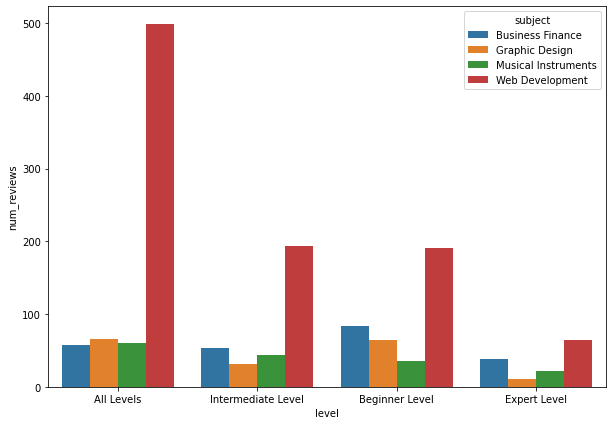

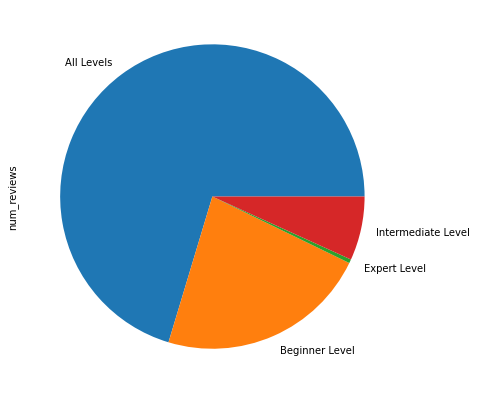

In [51]:
plot_num_of_count('num_reviews')

In [52]:
def plot_num_of_countable_feature(feature):
    # Using Seaborn 
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject',data=df,ci=None)
    plt.show()
    plt.figure(figsize=(10,7))
    #  How many subscribers per levels
    plt.title("Plot of {} per level".format(feature))
    df.groupby('level')[feature].sum().plot(kind='pie')
    plt.show()

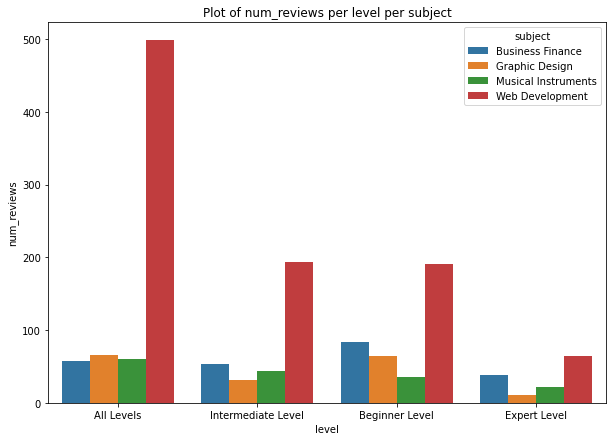

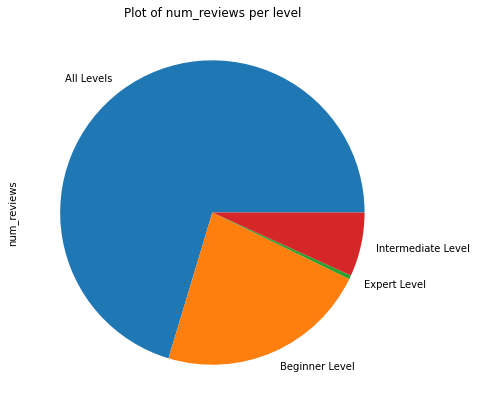

In [53]:
# Plot For the lectures * reviews
plot_num_of_countable_feature('num_reviews')

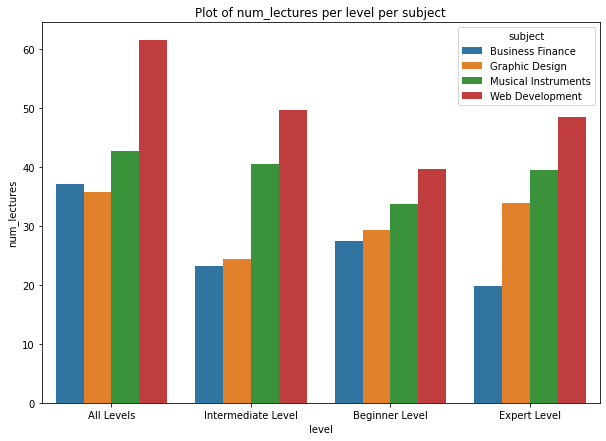

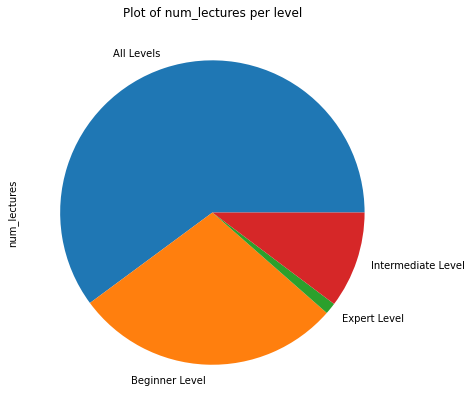

In [54]:
plot_num_of_countable_feature('num_lectures')

## EDA ON PRICE
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [55]:
df["price"].dtype

dtype('int64')

In [56]:
#What is the average price of a course
df['price'].mean()

66.0494834148994

In [57]:
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [58]:
#df['price'] = df['price'].str.replace('Free|TRUE','0')

In [59]:
df['price'] = df['price'].astype(float)

In [60]:
# What is the average price
df['price'].mean()

66.0494834148994

In [61]:
# What is the max price
df['price'].max()

200.0

In [62]:
# What is the max price location
df['price'].idxmax()

0

In [63]:
df.iloc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                                     1.5
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [64]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']

In [65]:
# What is the most profitable
df['profit'].max()

24316800.0

## Narative
.  Most profitable course made 24 million $

In [66]:
# The location of course
df['profit'].idxmax()

3230

In [67]:
df.iloc[3230]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                    43.0
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                        24316800.0
Name: 3230, dtype: object

In [68]:
### How Many Courses on Udemy Are paid or free
#df['is_paid'].unique()

In [69]:
#paid_dict = {'True':True,'False':False,'FALSE':False,'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}

In [70]:
#df['is_paid'] = df['is_paid'].map(paid_dict)

In [71]:
### How Many Courses on Udemy Are paid or free
#df['is_paid'].value_counts()

In [72]:
### How Many Courses on Udemy Are paid or free
#df['is_paid'].value_counts().plot(kind='bar')

In [73]:
#["is_paid"]

In [74]:
df.groupby("is_paid")["subject"].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1099
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

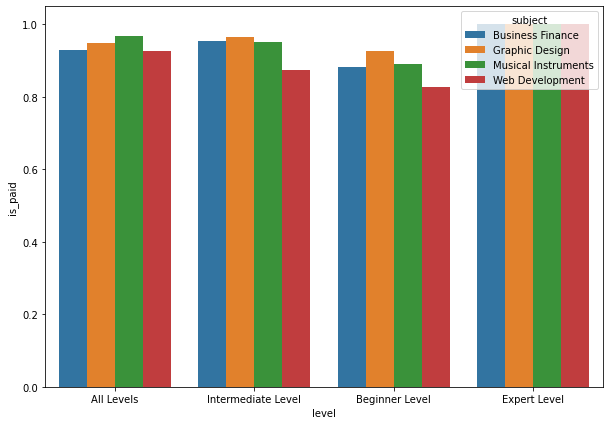

In [75]:
plt.figure(figsize=(10,7))
sns.barplot(x='level',y='is_paid', hue='subject',data=df,ci=None)
plt.show()

## ### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

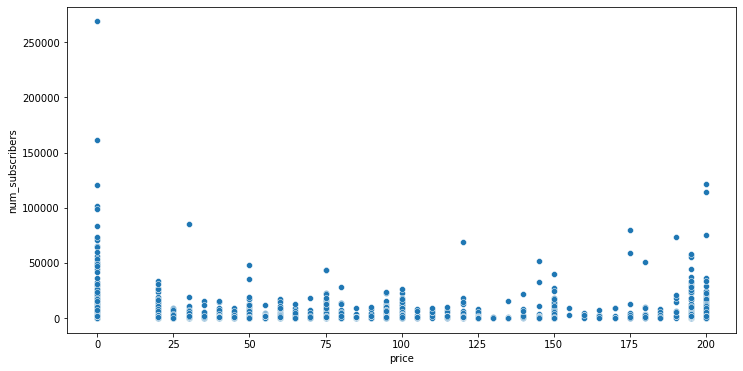

In [76]:
sns.scatterplot(data=df,x='price',y='num_subscribers')

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

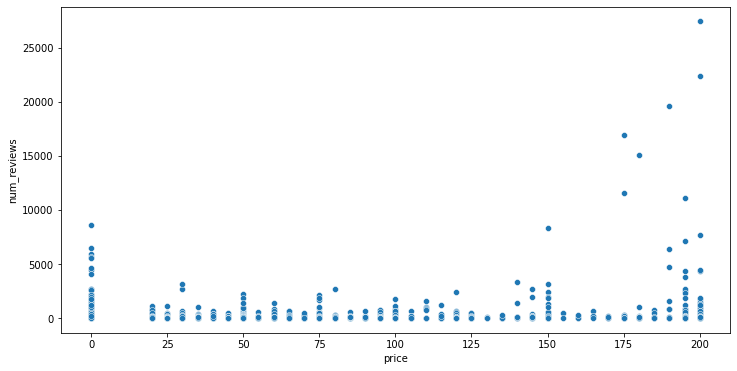

In [77]:
sns.scatterplot(data=df,x='price',y='num_reviews')

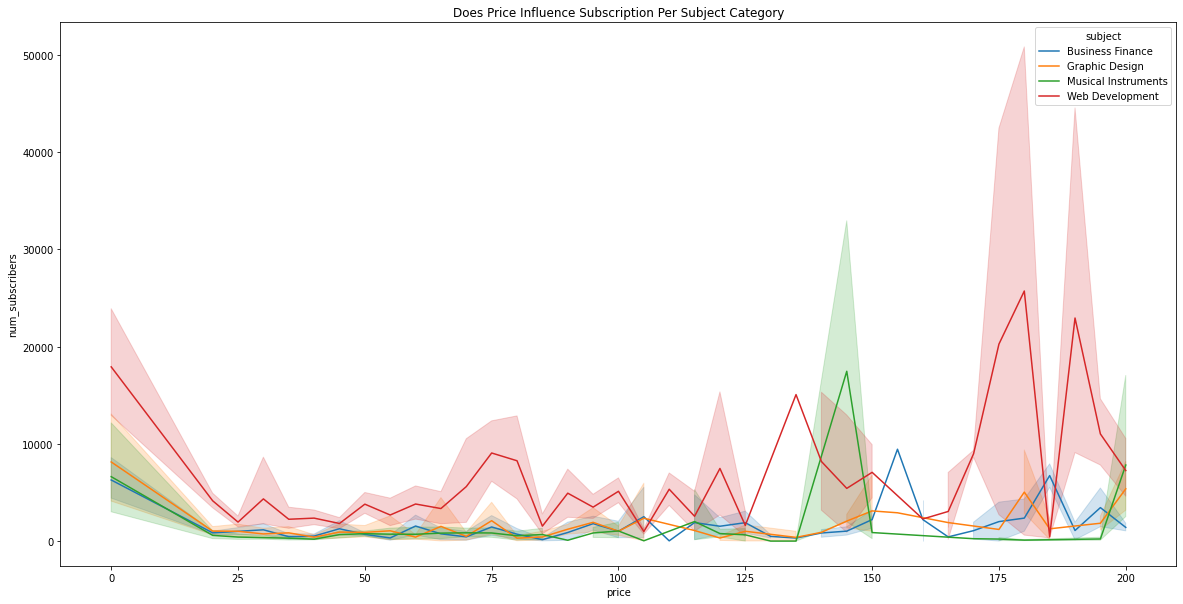

In [78]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()


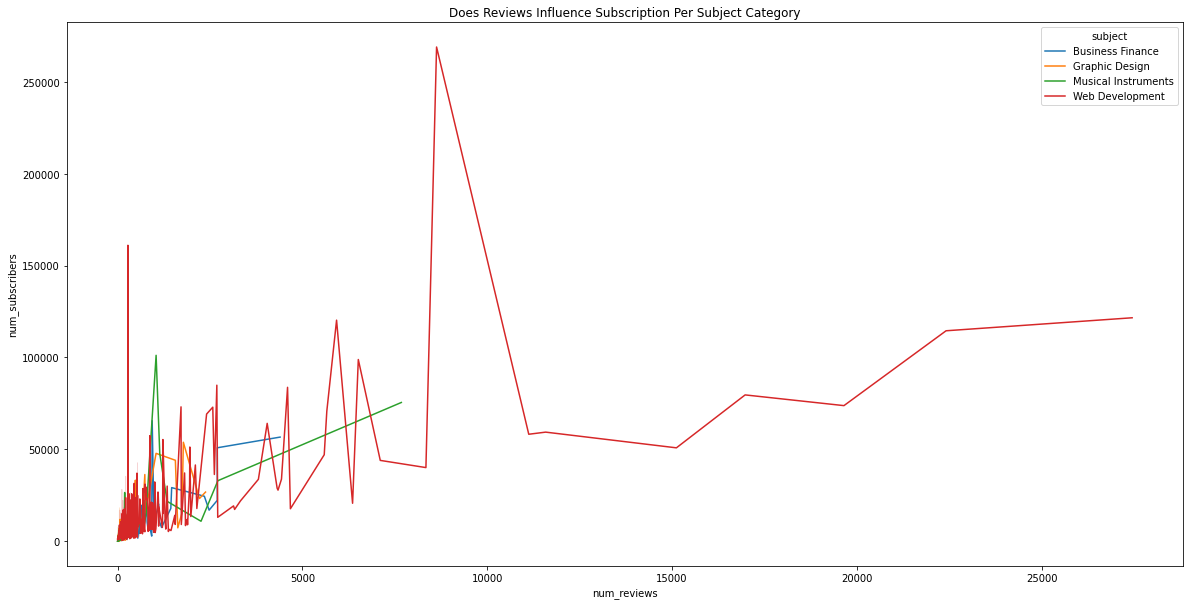

In [79]:
plt.figure(figsize=(20,10))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

##  Question on Time
Published Year

Number of courses per year

Distribution of subjects per year

Which year has the highest number of courses

What is the trend of courses per year


In [80]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200.0


In [81]:
df['published_timestamp'].dtype

dtype('O')

In [82]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [83]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3673    [2016-06-14, 17:36:46Z]
3674    [2017-03-10, 22:24:30Z]
3675    [2015-12-30, 16:41:42Z]
3676    [2016-08-11, 19:06:15Z]
3677    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3678, dtype: object

In [84]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [85]:
df["published_date"]

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [86]:
from datetime import datetime
def convert_to_dt(x):
    mydate = datetime.strptime(x,'%Y-%m-%d')
    result = mydate.strftime("%Y-%m-%d")
    return result

In [87]:
df['published_date'] = df['published_date'].str.replace('3 hours','2017-01-18')

In [88]:
convert_to_dt("2017-01-18")

'2017-01-18'

In [89]:
df['published_date'].apply(lambda x: convert_to_dt(x))

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [90]:
df['published_date'] = df['published_date'].apply(lambda x: convert_to_dt(x))

In [91]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [92]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp            object
subject                        object
profit                        float64
published_date         datetime64[ns]
dtype: object

In [93]:
df['year'] = df["published_date"].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [94]:
df.groupby('year')['num_subscribers'].value_counts()

year  num_subscribers
2011  3697               1
      7014               1
      12458              1
      26673              1
      69186              1
                        ..
2017  15276              1
      16158              1
      16829              1
      17784              1
      26742              1
Name: num_subscribers, Length: 2893, dtype: int64

<AxesSubplot:xlabel='year,num_subscribers'>

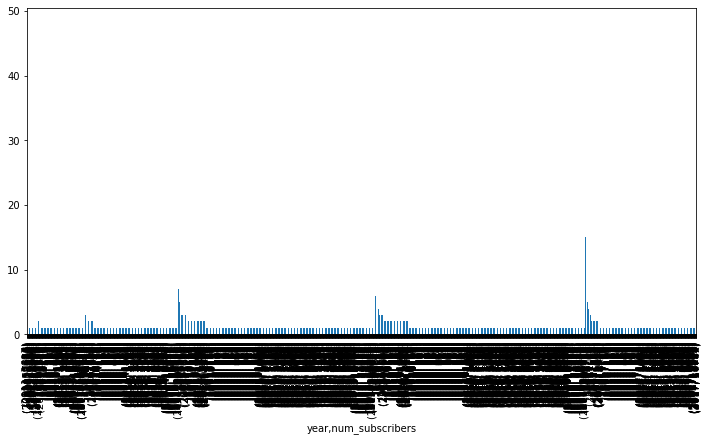

In [95]:
df.groupby('year')['num_subscribers'].value_counts().plot(kind="bar")

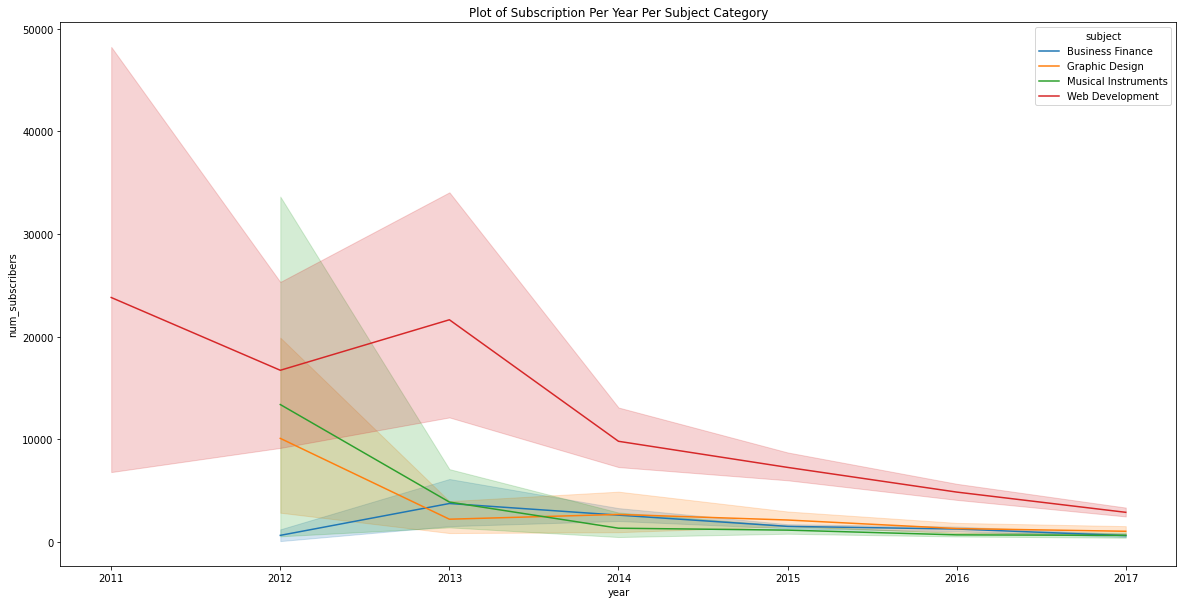

In [96]:
plt.figure(figsize=(20,10))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

## Questions on Course Title
Course Title

What is the most frequent words in course title

Longest/Shortest course title

How can we build recommendation systems via title using similarity

Most famous courses by number of subscribers

In [97]:
# Get the Longest Title for a course
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3673    56
3674    55
3675    29
3676    54
3677    52
Name: course_title, Length: 3678, dtype: int64

In [98]:
# Get the Longest Title for a course
df['course_title_len'] = df['course_title'].str.len()

In [99]:
# Get Longest title
df['course_title_len'].max()

243

In [100]:
# Get tlocation
df.iloc[243]

course_id                                                         337320
course_title           Cash Flow Valuation: Develop Your Financial Li...
url                     https://www.udemy.com/financial-literacy-basics/
is_paid                                                             True
price                                                              105.0
num_subscribers                                                     2987
num_reviews                                                           23
num_lectures                                                          19
level                                                         All Levels
content_duration                                                     2.0
published_timestamp                                 2014-12-22T13:39:16Z
subject                                                 Business Finance
profit                                                          313635.0
published_date                                     

## Keyword Extraction
Rake

Yakes

Collection

In [101]:
df['course_title']


0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [102]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [103]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [104]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [105]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [106]:
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [107]:
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)

In [108]:
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673      Learn jQuery Scratch  Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676        CSS Animations Create Amazing Effects Website
3677              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3678, dtype: object